In [1]:
# Importing the libraires

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing the dataset

In [4]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [5]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [6]:
X = dataset.iloc[:, :15].values
y = dataset.iloc[:, 15].values

In [7]:
# Feature Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [10]:
# Training the SOM

In [11]:
from minisom import MiniSom

In [12]:
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

In [13]:
som.random_weights_init(X)

In [14]:
som.train_random(data=X, num_iteration=100)

In [15]:
# Visualising the results

In [16]:
from pylab import bone, pcolor, colorbar, plot, show

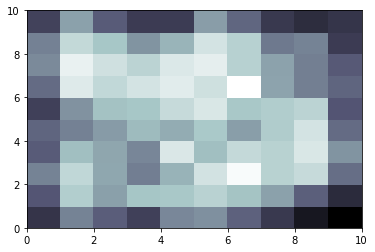

In [17]:
bone()
pcolor(som.distance_map().T)

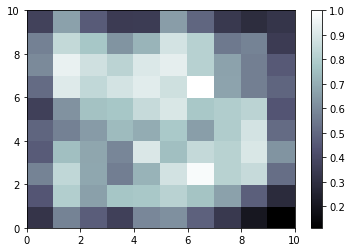

In [18]:
bone()
pcolor(som.distance_map().T)
colorbar()

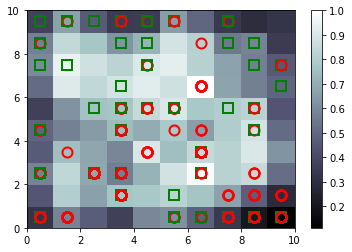

In [19]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [20]:
# Finding the frauds

In [21]:
mappings = som.win_map(X)

In [22]:
frauds = np.concatenate((mappings[(8, 1)], mappings[(6, 8)]), axis=0)

In [24]:
frauds = sc.inverse_transform(frauds)

In [25]:
frauds # indexes of frauds

array([[1.5663942e+07, 1.0000000e+00, 2.7830000e+01, 1.0000000e+00,
        1.0000000e+00, 2.0000000e+00, 8.0000000e+00, 3.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.7600000e+02, 5.3800000e+02],
       [1.5711446e+07, 1.0000000e+00, 2.2500000e+01, 1.2500000e-01,
        1.0000000e+00, 4.0000000e+00, 4.0000000e+00, 1.2500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.0000000e+02, 7.1000000e+01],
       [1.5720529e+07, 1.0000000e+00, 2.1080000e+01, 4.1250000e+00,
        1.0000000e+00, 3.0000000e+00, 8.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.4000000e+02, 1.0100000e+02],
       [1.5688210e+07, 1.0000000e+00, 3.8250000e+01, 1.0125000e+01,
        1.0000000e+00, 4.0000000e+00, 4.0000000e+00, 1.2500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,